<a href="https://colab.research.google.com/github/aminejarraya/Deep-Learning-Image-Compression-/blob/main/Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download Necessary Packages

In [ ]:
#Install open slide Package
!apt update && apt install -y openslide-tools
!pip install openslide-python

Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:13 https://developer.download.nvidia.co

In [ ]:
#Packages to Unzip rar file
!pip install pyunpack
!pip install patool

     |████████████████████████████████| 77 kB 4.7 MB/s 


In [ ]:
!pip install sewar

  Created wheel for sewar: filename=sewar-0.4.4-py3-none-any.whl size=10390 sha256=93a747e15d240d23acffd8f97d382dce820717dc35aea2cfb63883812f9b494e
  Stored in directory: /root/.cache/pip/wheels/b5/00/df/f1ba40d0d44c95b0db52804e518c128d5631866b91ea1960ba
Successfully built sewar


## Import packages

In [ ]:
import cv2
from google.colab import drive
import numpy as np
import tensorflow
from tensorflow.keras.layers import Conv2D, ConvLSTM2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import openslide
from tqdm import tqdm
from google.colab.patches import cv2_imshow
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import Dropout
import os
import skimage.io as io
import skimage.transform as trans
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

In [ ]:
import cv2
from google.colab import drive
import numpy as np
import tensorflow
import openslide
from tqdm import tqdm
from google.colab.patches import cv2_imshow
from sewar.full_ref import mse, uqi, ssim

In [ ]:
#Mount Drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Extract zip file located in the drive into home
Archive('/content/drive/MyDrive/TCGA-A8-A08F-01A-01-TS1.e2b24767-1df7-431b-bba2-45d1b4e767d8.rar').extractall('./')

## Read svs/tif/tiff file

In [ ]:
slide = openslide.OpenSlide("/content/drive/MyDrive/TT.svs")

In [ ]:
x = slide.read_region((8891,8131),0,(256,256))
x = np.array(x)
img = cv2.cvtColor(x, cv2.COLOR_BGRA2RGB)
img = (img.astype("float32"))/255.0
img = np.expand_dims(img, axis=0)
decoder = autoencoder.predict(img)
dix = decoder.reshape((256,256,3))
img = img.reshape((256,256,3))
original = (img * 255).astype("uint8")
recon = (dix * 255).astype("uint8")
output = np.hstack([original, recon])

# --------------------------------------- Testing Phase -----------------------------

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
!apt -qq update
!apt -qq install gcsfuse

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0  76878      0 --:--:-- --:--:-- --:--:-- 76878
OK
57 packages can be upgraded. Run 'apt list --upgradable' to see them.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  gcsfuse
0 upgraded, 1 newly installed, 0 to remove and 57 not upgraded.
Need to get 10.8 MB of archives.
After this operation, 23.2 MB of additional disk space will be used.
Selecting previously unselected package gcsfuse.
(Reading database ... 148504 files and directories currently installed.)
Preparing to unpack .../gcsfuse_0.36.0_amd64.deb ...
Unpacking gcsfuse (0.36.0) ...
Setting up gcsfuse (0.36.0) ...


In [ ]:
!mkdir myfolder

In [ ]:
!gcsfuse --implicit-dirs tiled myfolder

2021/08/29 19:24:02.497023 Using mount point: /content/myfolder
2021/08/29 19:24:02.505639 Opening GCS connection...
2021/08/29 19:24:02.937261 Mounting file system "tiled"...
2021/08/29 19:24:02.940708 File system has been successfully mounted.


In [ ]:
def SSIMLoss(y_true, y_pred):
  return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, 1.0))

In [ ]:
autoencoder = tensorflow.keras.models.load_model("/content/myfolder/Checks/LSTM-Loss=0.45583", custom_objects={'SSIMLoss': SSIMLoss})

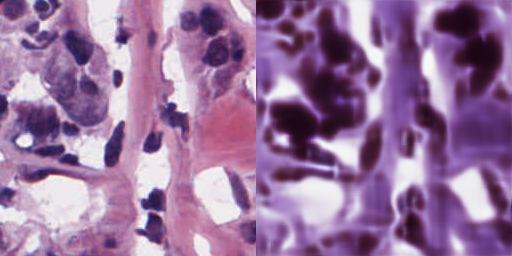

In [ ]:
cv2_imshow(output)

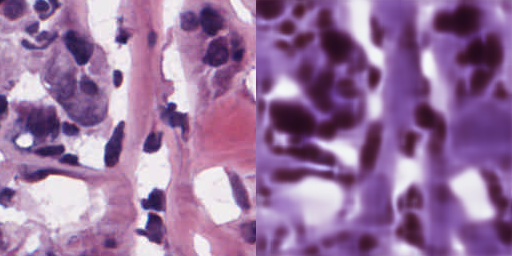

In [ ]:
cv2_imshow(output)

In [ ]:
print("Mean Squared Error = " + str(mse(original, recon)))
print("Universal Quality Index = " + str(uqi(original, recon)))
print("SSIM = " + str(ssim(original, recon)[0]))

Mean Squared Error = 2180.172566731771
Universal Quality Index = 0.8368677649975584
SSIM = 0.5907832895374885


In [ ]:
print("Mean Squared Error = " + str(mse(original, recon)))
print("Universal Quality Index = " + str(uqi(original, recon)))
print("SSIM = " + str(ssim(original, recon)[0]))

Mean Squared Error = 1675.0125376383464
Universal Quality Index = 0.8908733688656364
SSIM = 0.6306735618661609


In [ ]:
print("Mean Squared Error = " + str(mse(original, recon)))
print("Universal Quality Index = " + str(uqi(original, recon)))
print("SSIM = " + str(ssim(original, recon)[0]))

Mean Squared Error = 2070.015797932943
Universal Quality Index = 0.8662110386186143
SSIM = 0.6171642578012123


# Create Compressed regions

In [ ]:
def create_regions():
  wi = []
  all = []
  index = 0
  for i in tqdm(range(0,512,256)):
    for j in tqdm(range(0,512,256)):
      xs = slidet.read_region((92536+j,17383+i),0,(256,256))
      xs = np.array(xs)
      xs = cv2.cvtColor(xs, cv2.COLOR_BGRA2RGB)
      xs = (xs.astype("float32"))/255.0
      input = np.expand_dims(xs, axis=0)
      decoders = model.predict(input)
      dixs = decoders.reshape((256,256,3))
      recons = (dixs * 255).astype("uint8")
      wi.append(recons)
    out1 = np.hstack(wi)
    wi.clear()
    all.append(out1)
  final = np.vstack(all)
  return final

In [ ]:
output = create_regions()

100%|██████████| 2/2 [00:31<00:00, 15.72s/it]


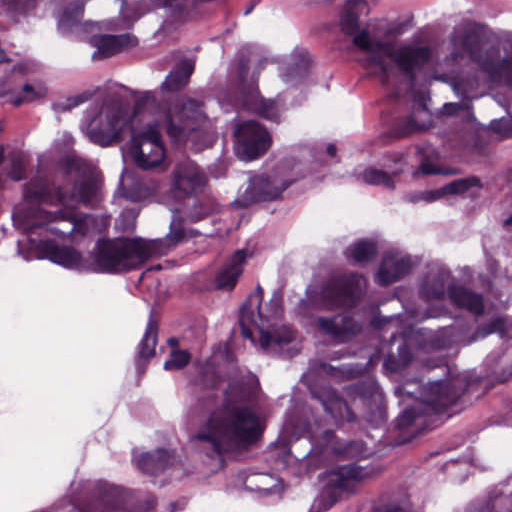

In [ ]:
GT = slidet.read_region((92536,17383),0,(512,512))

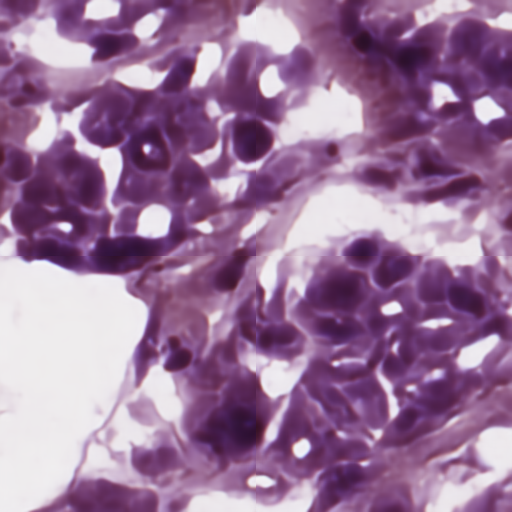

In [ ]:
cv2_imshow(output)

#Results

In [ ]:
GT = np.array(GT)
GT = cv2.cvtColor(GT, cv2.COLOR_BGRA2RGB)

In [ ]:
print("Mean Squared Error = "+ str(mse(GT,output)))

Mean Squared Error = 115.31391143798828


In [ ]:
print("Universal Quality Image Index = "+ str(uqi(GT,output)))

Universal Quality Image Index = 0.9943585891422163


In [ ]:
print("Structural Similarity Index = "+ str(ssim(GT,output)[0]))

Structural Similarity Index = 0.8757788766648983
